In [807]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Model evaluation metrics
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

# For saving/loading the model
import pickle

In [808]:
#Load the dataset from the specified path into a DataFrame
df = pd.read_csv(r"E:\Download\Employers_data.csv")
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [809]:
#Check for missing (null) values in each column of the DataFrame
df.isnull().sum()

Employee_ID         0
Name                0
Age                 0
Gender              0
Department          0
Job_Title           0
Experience_Years    0
Education_Level     0
Location            0
Salary              0
dtype: int64

In [810]:
# Drop the 'Employee_ID' and 'Name' columns from the DataFrame as they are likely not useful for prediction
df.drop(columns=["Employee_ID","Name"],inplace=True)
df.head()

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,56,Male,Sales,Executive,33,Master,Seattle,195000
2,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,25,Female,HR,Analyst,2,Master,Seattle,70000


In [811]:
# Compute the correlation matrix between the numeric columns: 'Age', 'Experience_Years', and 'Salary'
correlation=df[['Age','Experience_Years','Salary']].corr()
correlation

,Age,Experience_Years,Salary
Age,1.000000,0.982299,0.927958
Experience_Years,0.982299,1.000000,0.898025
Salary,0.927958,0.898025,1.000000


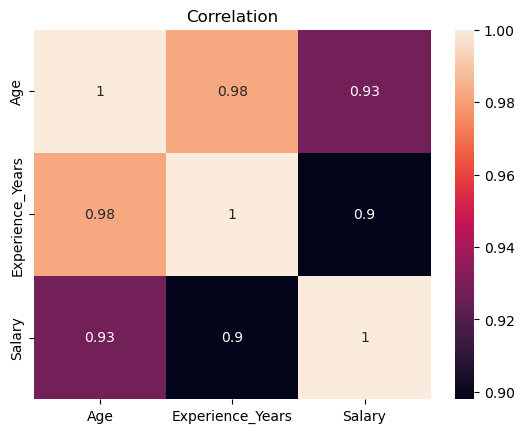

In [812]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation, annot=True)
plt.title("Correlation")
plt.show()

In [813]:
# Displays the number of unique values in each of the specified categorical columns
df[['Gender','Department','Job_Title','Education_Level','Location']].nunique()

Gender             2
Department         6
Job_Title          5
Education_Level    3
Location           5
dtype: int64

In [814]:
# Shows unique categories in 'Education_Level' to prepare for encoding
df['Education_Level'].unique()

array(['Master', 'Bachelor', 'PhD'], dtype=object)

In [815]:
# Separating the features (x) and target variable (y) for model training
x = df.drop(columns=["Salary"])
y = df["Salary"]

In [816]:
# Splitting the dataset into training and testing sets (80% train, 20% test) with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [817]:
#Defining column types for preprocessing:
ordinal_col = ['Education_Level']
ordinal_order = [['Bachelor', 'Master', 'PhD']]

one_hot_col = ['Gender','Department','Job_Title','Location']
numeric_col = ['Age','Experience_Years']

In [818]:
# Defining a preprocessor to encode categorical features and scale numerical ones in a single step.
preprocessor = ColumnTransformer(transformers=[("ordinal", OrdinalEncoder(categories=ordinal_order), ordinal_col),
                                               ("onehot", OneHotEncoder(drop="first"), one_hot_col),
                                               ("numeric", StandardScaler(), numeric_col)])

In [819]:
# Creating a pipeline that first preprocesses the data and then applies Linear Regression for modeling.
model = Pipeline(steps=[('preprocess', preprocessor),('regressor', LinearRegression())])

In [820]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Bachelor',
                                                                              'Master',
                                                                              'PhD']]),
                                                  ['Education_Level']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Department',
                                                   'Job_Title', 'Location']),
                                                 ('numeric', StandardScaler(),
                                                  ['Age',
                                                   'Experience_Years'])])),
                ('regressor', LinearRegression())])

In [821]:
# Creating a new DataFrame with a single sample input and using the trained pipeline model to predict the salary for that input.
pred_test = pd.DataFrame([{
    'Age': 30,
    'Gender': 'Male',
    'Department': 'Finance',
    'Job_Title': 'Analyst',
    'Experience_Years': 9,
    'Education_Level': 'Bachelor',
    'Location': 'New York'
}])
y_pred = model.predict(pred_test)
y_pred

array([76327.54812919])

In [822]:
# Printing the R² scores (in percentage) for both test and train sets to evaluate how well the model fits the data.
print("Test R² Score:", model.score(x_test, y_test) * 100)
print("Train R² Score:", model.score(x_train, y_train) * 100)

Test R² Score: 99.17589540203949
Train R² Score: 99.13888442137642


In [823]:
# Evaluate model performance using RMSE and MAE on test data
y_pred = model.predict(x_test)

print("Test RMSE:", root_mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Test RMSE: 4167.653944362456
Test MAE: 3337.161401327434


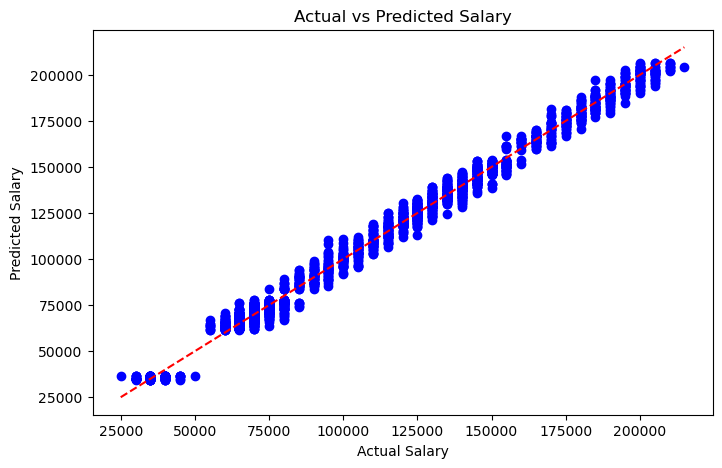

In [824]:
# Visualize how well the model predicts salaries by comparing actual vs predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


In [825]:
residuals = y_test - y_pred
residuals

6252   -2586.499542
4684   -5525.157296
1731   -2361.854202
4742   -1935.349892
4521   -3103.217355
           ...     
6412    2675.195815
8285     518.744994
7853    4382.179052
1095   -4842.398690
6929   -3526.027434
Name: Salary, Length: 2000, dtype: float64

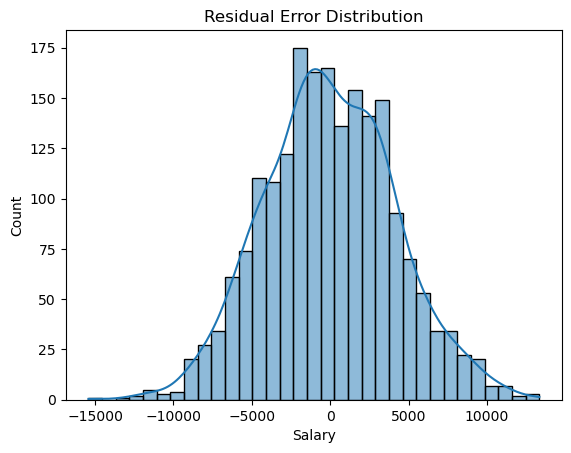

In [826]:
# Plot the distribution of residuals to check if errors are normally distributed
sns.histplot(residuals, kde=True)
plt.title("Residual Error Distribution")
plt.show()

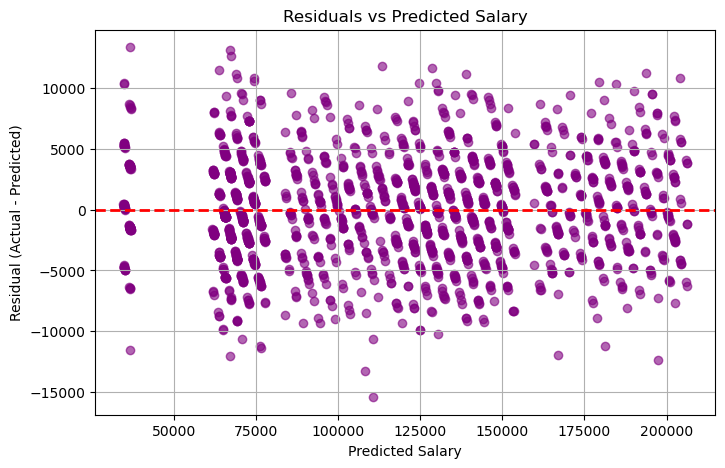

In [827]:
# Visualizing the pattern of residuals to evaluate model accuracy and assumptions
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Salary")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Salary")
plt.grid(True)
plt.show()

In [828]:
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the preprocessing pipeline
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)